Здесь сравниваются 3 случая: плоская щетка с крышкой (surface and mirror(1 and 2)), две взаимопроникающие щетки, цилиндрическая пора: с НЕзаданной upperbound и с заданной (surface, mirror)

In [2]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF')

from pore_main.pore_utils import pore_utils
from py_utils.generate_pore_in_files import generate_pore_in_files
from py_utils.generate_flat_cap_in_files import generate_flat_cap_in_files
from py_utils.generate_two_flat_brushes import generate_two_flat_brush_in_files


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Условия

In [11]:

[226, 221 ,209.33333333, 201]

array([226.        , 221.83333333, 217.66666667, 213.5       ,
       209.33333333, 205.16666667, 201.        ])

Одна щетка с крышкой, граничные условия: mirror

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.986817e+00 |g| = 4.774260e+00 alpha = 1.000000e+00 
hessian scaling: 0.279042
it =  1  E = 1.907351e+00 |g| = 4.839988e+00 alpha = 1.209457e-01 
it =  2  E = 1.043969e+01 |g| = 4.622846e+00 alpha = 3.692534e-03 
it =  3  E = 5.332484e+00 |g| = 4.671806e+00 alpha = 1.330040e-02 
it =  4  E = 8.112331e+00 |g| = 4.399068e+00 alpha = 5.119635e-03 
it =  5  E = 3.396655e+00 |g| = 4.356938e+00 alpha = 2.690803e-02 
it =  6  E = 3.016313e+00 |g| = 4.552850e+00 alpha = 3.409585e-02 
it =  7  E = 3.863510e+00 |g| = 4.441553e+00 alpha = 1.920755e-02 
it =  8  E = 1.243996e+01 |g| = 4.447005e+00 alpha = 1.964304e-03 
it =  9  E = 6.552109e+00 |g| = 4.399014e+00 alpha = 7.402282e-03 
it =  10  E = 4.640360e+00 |g| = 4.313106e+0

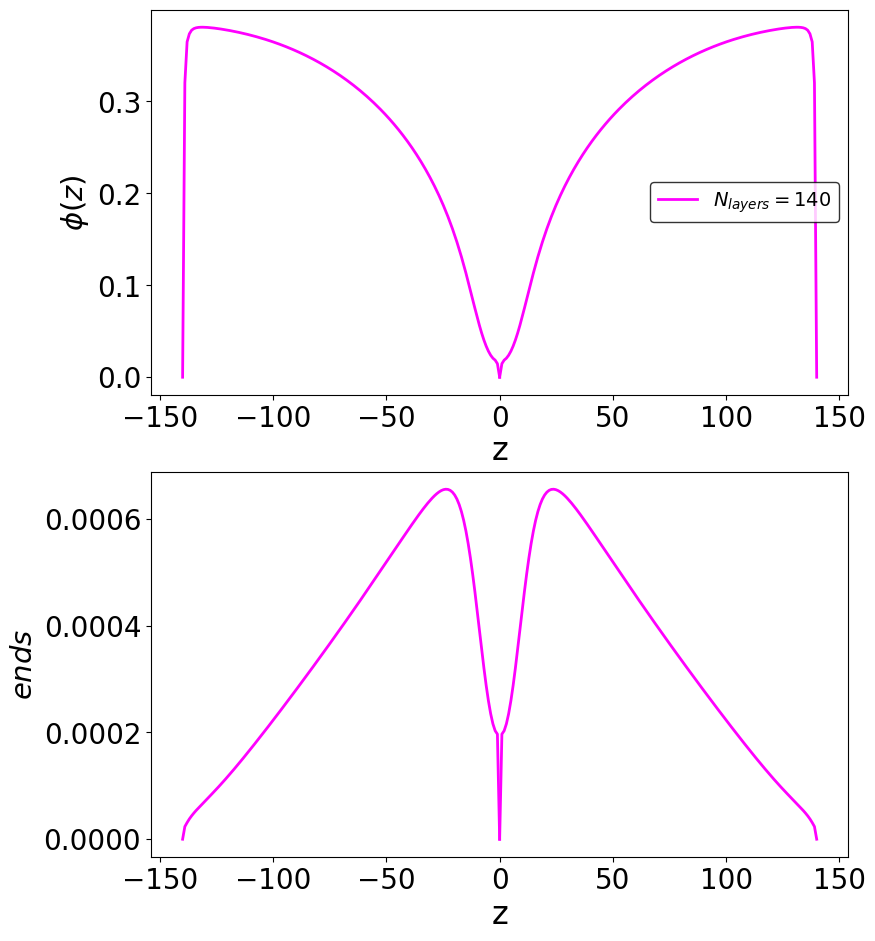

In [16]:
N = 800
S = 20
Cs = 0.001
alpha = 0
N_layers = np.linspace(140, 140, num = 1)

colors = ['fuchsia', 'blue', 'limegreen', 'orangered', 'orange', 'skyblue', 'slateblue', 'black', 'hotpink',
              'crimson', 'aquamarine']

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for n, color in zip(N_layers, colors):
    file_name_pro_flat_cap_mirror = generate_flat_cap_in_files(template_cap = '/home/tpopova/prj/PB_SCF/pore_templates/temp_surface.in',
                    
                    #название параметра
                    range_param = 'N_layers',
                    
                    type_lowerbound = 'surface',
                    
                    N_brush = N,
                    N_layers = round(n),
                    S = S,
                    Cs = Cs,
                    alpha = alpha,
                    min_range_value = 1,
                    max_range_value = 1,
                    )

    c_polymer_mirror = np.asarray(pd.read_csv(file_name_pro_flat_cap_mirror, sep='\t')['mol_brush_phi'])

    ends_mirror = np.asarray(pd.read_csv(file_name_pro_flat_cap_mirror, sep='\t')['mon_G_phi'])
#     psi_mirror = np.asarray(pd.read_csv(file_name_pro_flat_cap_mirror, sep='\t')['sys_noname_psi'])
    
    r_range = np.linspace(0, round(n), num = round(n) + 2)
    
    ax1.plot(r_range, c_polymer_mirror,
            linestyle='-',
            linewidth= 2,
            color=color,
            label=f'$N_{{layers}} = {round(n)}$')
    
    ax1.plot(-1 * r_range, c_polymer_mirror,
            linestyle='-',
            linewidth= 2,
            color=color)

    ax2.plot(r_range, ends_mirror,
                linestyle='-',
                linewidth= 2,
                color=color)
    
    ax2.plot(-1 * r_range, ends_mirror,
                linestyle='-',
                linewidth= 2,
                color=color)


#  Добавляем подписи к осям:
ax1.set_xlabel('z',
                fontsize=23,  
                color='black', labelpad=2.5) 

ax1.set_ylabel(r'$\phi(z)$',
                fontsize=21, 
                color='black')
ax2.set_xlabel('z',
                fontsize=23, 
                color='black') 

ax2.set_ylabel('$ends$',
                fontsize=21,
                color='black') 

# legend
ax1.legend(
    fontsize=14,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии
            title_fontsize='12',  # размер шрифта заголовка
            loc = 'center right')

fig.set_figwidth(9)
fig.set_figheight(11)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.show()
# save = fig.savefig('Figure_2.png', dpi = 300)

Одна щетка с крышкой, граничные условия: surface

In [11]:
file_name_pro_flat_cap_surface = generate_flat_cap_in_files(template_cap = '/home/tpopova/prj/PB_SCF/pore_templates/temp_surface.in',
                   
                   #название параметра
                   range_param = 'N_layers',
                   
                   type_lowerbound = 'surface',
                   
                   N_brush = N,
                   N_layers = N_layers,
                   S = S,
                   Cs = Cs,
                   alpha = alpha,
                   min_range_value = 4,
                   max_range_value = 4,
                   )

c_polymer_surface = np.asarray(pd.read_csv(file_name_pro_flat_cap_surface, sep='\t')['mol_brush_phi'])

ends_surface = np.asarray(pd.read_csv(file_name_pro_flat_cap_surface, sep='\t')['mon_G_phi'])
psi_surface = np.asarray(pd.read_csv(file_name_pro_flat_cap_surface, sep='\t')['sys_noname_psi'])

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.535280e+00 |g| = 7.307270e+00 alpha = 1.000000e+00 
hessian scaling: 2.82353


it =  1  E = 2.279107e+00 |g| = 6.495690e+00 alpha = 1.136850e-01 
it =  2  E = 1.813737e+00 |g| = 6.432085e+00 alpha = 1.678865e-01 
it =  3  E = 3.808201e+00 |g| = 5.725483e+00 alpha = 3.134083e-02 
it =  4  E = 2.209229e+00 |g| = 6.154576e+00 alpha = 9.402470e-02 
it =  5  E = 3.494572e+00 |g| = 6.700574e+00 alpha = 4.410904e-02 
it =  6  E = 3.510078e+00 |g| = 6.750397e+00 alpha = 4.101102e-02 
it =  7  E = 6.929510e+00 |g| = 6.635459e+00 alpha = 9.654073e-03 
it =  8  E = 2.612288e+01 |g| = 6.551383e+00 alpha = 6.284257e-04 
it =  9  E = 3.585078e+00 |g| = 6.292106e+00 alpha = 3.014809e-02 
it =  10  E = 5.376886e+00 |g| = 6.300468e+00 alpha = 1.268123e-02 
it =  11  E = 3.029582e+00 |g| = 5.936678e+00 alpha = 3.566878e-02 
it =  12  E = 3.871053e+00 |g| = 6.222582e+00 alpha = 2.180259e-02 
it =  13  E = 7.229935e+00 |g| = 5.655309e+00 alpha = 5.409241e-03 
it =  14  E = 2.496122e+00 |g| = 6.175646e+00 alpha = 4.745957e-02 
it =  15  E = 3.374902e+00 |g| = 6.719627e+00 alpha = 2.9

Две взаимопроникающие щетки

In [12]:
file_name_pro_two_brushes = generate_two_flat_brush_in_files(template_two = '/home/tpopova/prj/PB_SCF/pore_templates/two_flat_compress_temp.in',
                   
                   #название параметра
                   range_param = 'N_layers',
                   
                   N_brush_left = N,
                   N_brush_right = N,
                   N_layers = N_layers*2,
                   S_left = S,
                   S_right = S,
                   Cs = Cs,
                   alpha_left =alpha,
                   alpha_right = alpha,
                   min_range_value = 6,
                   max_range_value = 6,
                   )

c_polymer_right = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mol_brushright_phi'])
c_polymer_left = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mol_brushleft_phi'])

ends_right = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mon_E_phi'])
ends_left = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mon_G_phi'])

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 3.112274e+00 |g| = 1.060004e+01 alpha = 1.000000e+00 
hessian scaling: 1.90552
it =  1  E = 2.789126e+00 |g| = 9.364421e+00 alpha = 1.094339e-01 
it =  2  E = 2.915484e+00 |g| = 1.012777e+01 alpha = 1.021347e-01 
it =  3  E = 6.624022e+00 |g| = 9.094245e+00 alpha = 1.644552e-02 
it =  4  E = 4.869810e+00 |g| = 9.362733e+00 alpha = 2.927278e-02 
it =  5  E = 1.806410e+01 |g| = 8.861180e+00 alpha = 1.881656e-03 
it =  6  E = 3.667885e+00 |g| = 9.443421e+00 alpha = 4.614058e-02 
it =  7  E = 5.197676e+00 |g| = 8.941662e+00 alpha = 2.063127e-02 
it =  8  E = 5.436696e+00 |g| = 9.248282e+00 alpha = 2.070494e-02 
it =  9  E = 5.737189e+00 |g| = 9.280109e+00 alpha = 1.758596e-02 
it =  10  E = 8.335220e+00 |g| = 9.202328e+00

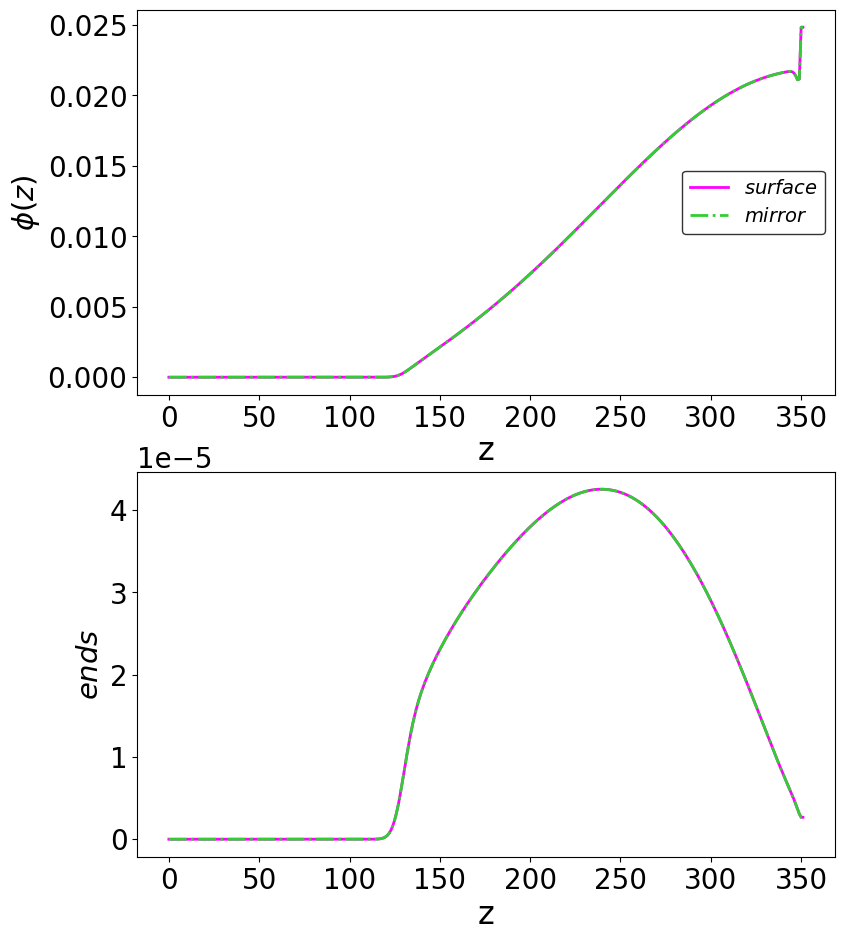

In [13]:
colors = ['fuchsia', 'blue', 'limegreen', 'orangered', 'orange', 'skyblue', 'slateblue', 'black', 'hotpink',
              'crimson', 'aquamarine']

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(c_polymer_surface,
            linestyle='-',
            linewidth= 2,
            color='fuchsia',
            label=f'$surface$')

ax1.plot(c_polymer_mirror,
            linestyle='-.',
            linewidth= 2,
            color='limegreen',
            label=f'$mirror$')


# ax1.plot(c_polymer_left,
#             linestyle='--',
#             linewidth= 2,
#             color='slateblue',
#             label=f'$left \\ brush$')

# ax1.plot(c_polymer_right,
#             linestyle='--',
#             linewidth= 2,
#             color='skyblue',
#             label=f'$right \\ brush$')

ax2.plot(ends_surface,
            linestyle='-',
            linewidth= 2,
            color='fuchsia')

ax2.plot(ends_mirror,
            linestyle='-.',
            linewidth= 2,
            color='limegreen')

# ax2.plot(ends_left,
#             linestyle='--',
#             linewidth= 2,
#             color='slateblue')

# ax2.plot(ends_right,
#             linestyle='--',
#             linewidth= 2,
#             color='skyblue')

#  Добавляем подписи к осям:
ax1.set_xlabel('z',
                fontsize=23,  
                color='black', labelpad=2.5) 

ax1.set_ylabel(r'$\phi(z)$',
                fontsize=21, 
                color='black')
ax2.set_xlabel('z',
                fontsize=23, 
                color='black') 

ax2.set_ylabel('$ends$',
                fontsize=21,
                color='black') 

# legend
ax1.legend(
    fontsize=14,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии
            title_fontsize='12',  # размер шрифта заголовка
            loc = 'center right')
# # legend
# ax2.legend(fontsize=16,
#             ncol=1,  # количество столбцов
#             facecolor='white',  # цвет области
#             edgecolor='black',  # цвет крайней линии   #  заголовок
#             title_fontsize='12', loc = 'upper right'  # размер шрифта заголовка
#             )

fig.set_figwidth(9)
fig.set_figheight(11)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.show()
# save = fig.savefig('Figure_2.png', dpi = 300)